# Computational Simulation of Equivalence Class Formation Using the go/no-go Procedure with Compound Stimuli

### Abstract
Research about equivalence has commonly utilized human participants as experimental subjects. More recently, computational models have been capable of reproducing performances observed in experiments with humans. The computational model often utilized is called RELNET, and it simulates training and testing trials of conditional relations using the matching-to-sample procedure (MTS). The differentiation between sample stimulus and comparison stimuli, indispensable in MTS, implies operational difficulties for simulations. For this reason, new studies seek to utilize alternative procedures to MTS, which do not differentiate the functions of the antecedent stimuli. This work evaluated the possibility of developing a new computational model to simulate equivalence class formation using the go/no-go procedure with compound stimuli. In Experiment 1, artificial neural networks were utilized to simulate training of the AB and BC relations as well as the testing of the AC relation. The results showed that four out of six runs demonstrated equivalence class formation. Experiment 2 evaluated whether the additional class training performed in Experiment 1, which was analogous to the simulation of pre-experimental experience of human participants, would be essential for simulating the establishment of equivalence classes. It was found that it was not possible to simulate equivalence class formation without the additional class training. Altogether, the experiments show that it is possible to simulate equivalence class formation using the go/no-go procedure with compound stimuli and that it is necessary to conduct additional class training. The model developed is, therefore, an alternative to RELNET for the study of equivalence relations using computational simulations.

[article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4960284/pdf/40732_2016_Article_184.pdf)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import csv

%matplotlib inline
plt.style.use('seaborn')

In [2]:
dat=pd.read_csv("Results_1/TF_replicas.csv", 
                header=None, 
                names=(["exp_1_n_epocs",
                        "exp_1_pred_train_1",
                        "exp_1_pred_train_2",
                        "exp_1_pred_train_3",
                        "exp_1_pred_train_4",
                        "exp_1_pred_train_5",
                        "exp_1_pred_train_6",
                        "exp_1_pred_train_7",
                        "exp_1_pred_train_8",
                        "exp_1_pred_train_9",
                        "exp_1_pred_train_10",
                        "exp_1_pred_train_11",
                        "exp_1_pred_test_1",
                        "exp_1_pred_test_2",
                        "exp_1_pred_test_3",
                        "exp_1_pred_test_4",
                        "exp_2_final_loss",
                        "exp_2_n_epocs",
                        "exp_2_pred_train_1",
                        "exp_2_pred_train_2",
                        "exp_2_pred_train_3",
                        "exp_2_pred_train_4",
                        "exp_2_pred_train_5",
                        "exp_2_pred_train_6",
                        "exp_2_pred_train_7",
                        "exp_2_pred_train_8",
                        "exp_2_pred_test_1",
                        "exp_2_pred_test_2",
                        "exp_2_pred_test_3",
                        "exp_2_pred_test_4",
                       ]))# , sep=";" # para bases en español #_hid_4_1
#dat=pd.read_csv("Results_1/test_hid_4_1.csv")# , sep=";" # para bases en español #_hid_4_1
list(dat.columns)

['exp_1_n_epocs',
 'exp_1_pred_train_1',
 'exp_1_pred_train_2',
 'exp_1_pred_train_3',
 'exp_1_pred_train_4',
 'exp_1_pred_train_5',
 'exp_1_pred_train_6',
 'exp_1_pred_train_7',
 'exp_1_pred_train_8',
 'exp_1_pred_train_9',
 'exp_1_pred_train_10',
 'exp_1_pred_train_11',
 'exp_1_pred_test_1',
 'exp_1_pred_test_2',
 'exp_1_pred_test_3',
 'exp_1_pred_test_4',
 'exp_2_final_loss',
 'exp_2_n_epocs',
 'exp_2_pred_train_1',
 'exp_2_pred_train_2',
 'exp_2_pred_train_3',
 'exp_2_pred_train_4',
 'exp_2_pred_train_5',
 'exp_2_pred_train_6',
 'exp_2_pred_train_7',
 'exp_2_pred_train_8',
 'exp_2_pred_test_1',
 'exp_2_pred_test_2',
 'exp_2_pred_test_3',
 'exp_2_pred_test_4']

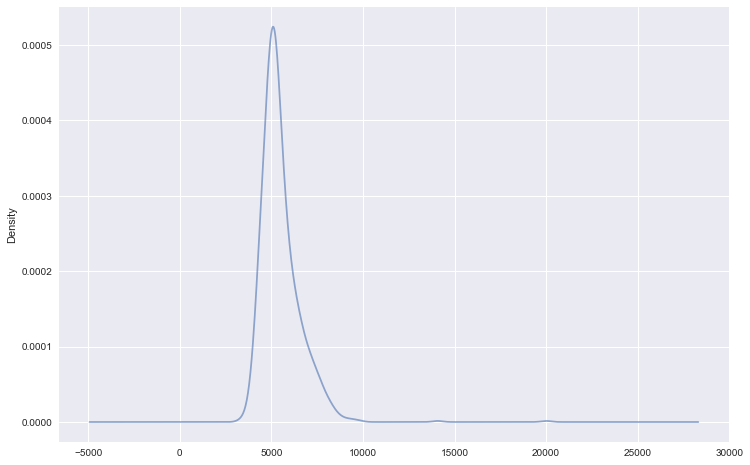

In [4]:
dat["exp_1_n_epocs"].plot.density(figsize=(12,8),alpha=0.6)

/home/yagwar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=20000, right=20000
  'left=%s, right=%s') % (left, right))


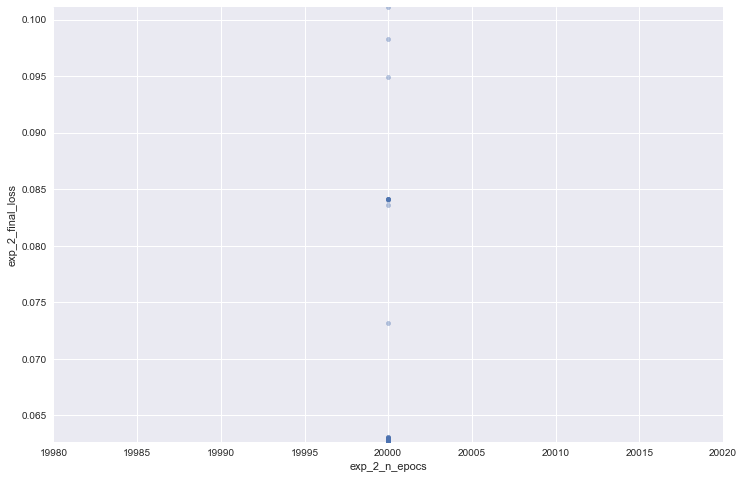

In [5]:
dat.plot.scatter(
    x='exp_2_n_epocs',
    y='exp_2_final_loss',
    ylim=(dat["exp_2_final_loss"].min(),dat["exp_2_final_loss"].max()),
    xlim=(dat["exp_2_n_epocs"].min(),dat["exp_2_n_epocs"].max()),
    figsize=(12,8),
    alpha=0.4
)
#dat['exp_1_loss'].plot.hist()

In [6]:
dat["exp_2_final_loss"].describe()

count    971.000000
mean       0.063047
std        0.002767
min        0.062659
25%        0.062704
50%        0.062746
75%        0.062785
max        0.101124
Name: exp_2_final_loss, dtype: float64

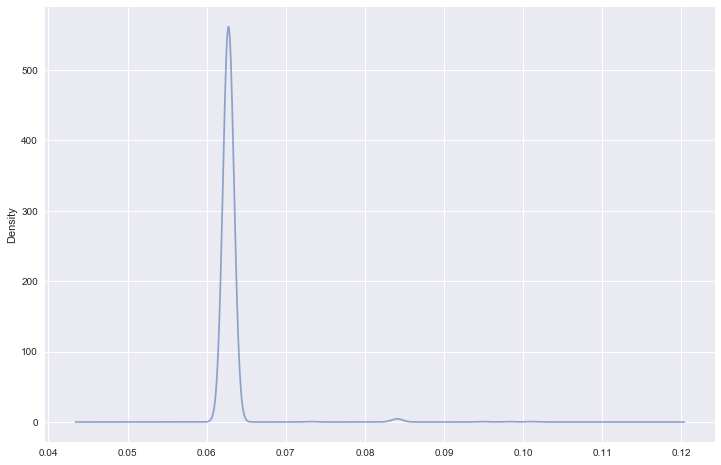

In [7]:
dat["exp_2_final_loss"].plot.density(figsize=(12,8),alpha=0.6)

In [8]:
dat[["exp_1_pred_test_1","exp_1_pred_test_2","exp_1_pred_test_3","exp_1_pred_test_4"]].describe()

,exp_1_pred_test_1,exp_1_pred_test_2,exp_1_pred_test_3,exp_1_pred_test_4
count,971.000000,971.000000,971.000000,971.000000
mean,0.722646,0.362958,0.731346,0.364330
std,0.300996,0.301133,0.294571,0.304082
min,0.013921,0.011432,0.016078,0.023205
25%,0.546620,0.114303,0.567218,0.118367
50%,0.881427,0.233186,0.890072,0.222263
75%,0.947281,0.600804,0.946911,0.608090
max,0.989993,0.978444,0.992724,0.980803


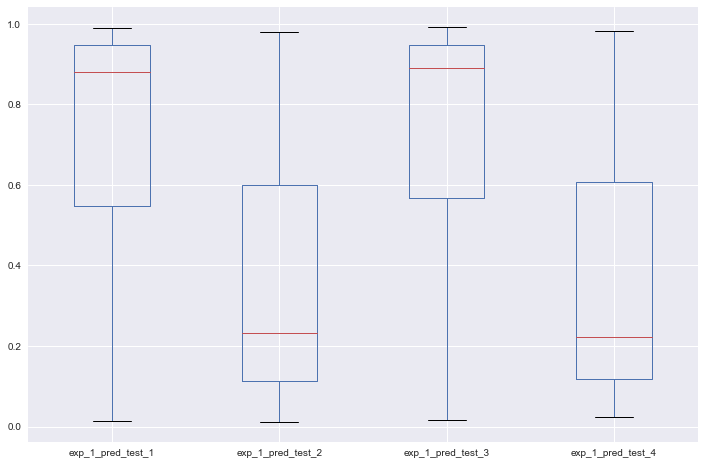

In [9]:
dat[["exp_1_pred_test_1","exp_1_pred_test_2","exp_1_pred_test_3","exp_1_pred_test_4"]].plot(kind="box", figsize=(12,8))#, alpha=0.6)

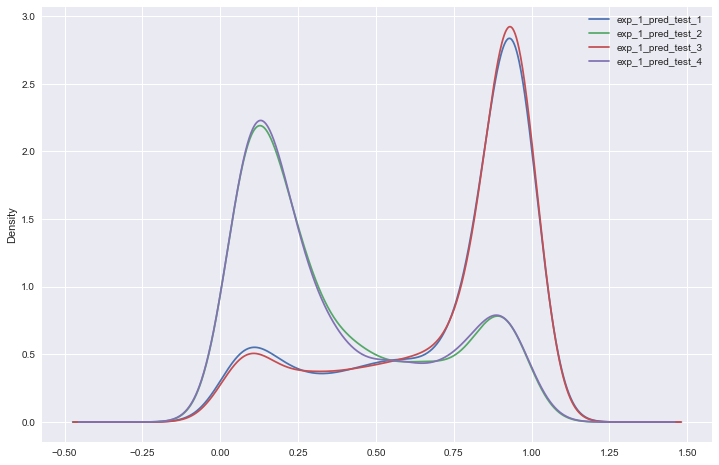

In [10]:
dat[["exp_1_pred_test_1",
     "exp_1_pred_test_2",
     "exp_1_pred_test_3",
     "exp_1_pred_test_4"
    ]].plot.density(figsize=(12,8))

In [11]:
dat[["exp_2_pred_test_1","exp_2_pred_test_2","exp_2_pred_test_3","exp_2_pred_test_4"]].describe()

,exp_2_pred_test_1,exp_2_pred_test_2,exp_2_pred_test_3,exp_2_pred_test_4
count,971.000000,971.000000,971.000000,971.000000
mean,0.337170,0.909224,0.537414,0.020277
std,0.258684,0.124990,0.313610,0.058483
min,0.003194,0.196046,0.010035,0.000099
25%,0.114502,0.895013,0.233115,0.003420
50%,0.269610,0.965543,0.561838,0.007129
75%,0.529498,0.981265,0.836355,0.015194
max,0.964313,0.999452,0.998653,0.741406


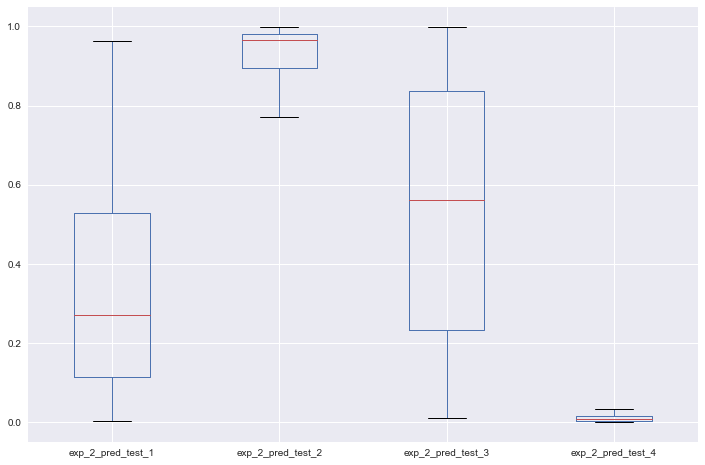

In [12]:
dat[["exp_2_pred_test_1","exp_2_pred_test_2","exp_2_pred_test_3","exp_2_pred_test_4"]].plot(kind="box", figsize=(12,8))#, alpha=0.6)

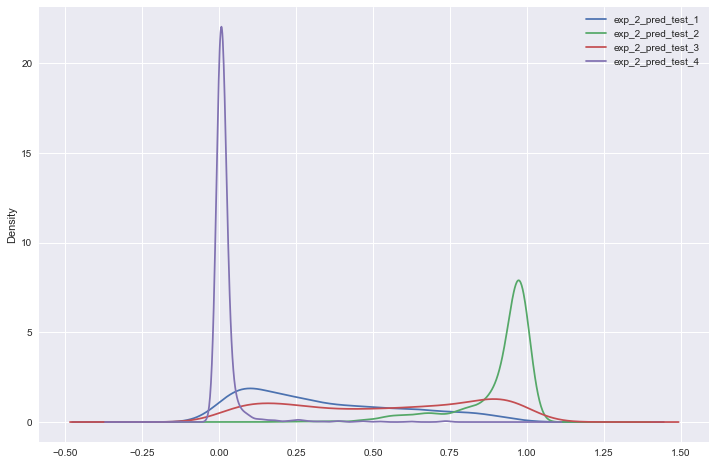

In [13]:
dat[["exp_2_pred_test_1",
     "exp_2_pred_test_2",
     "exp_2_pred_test_3",
     "exp_2_pred_test_4"
    ]].plot.density(figsize=(12,8))